# Classification

## Decision Tree

- 분류(Classificaion)와 회귀(Regression)에 모두 활용 될 수 있는 알고리즘
- 각 영역의 순도(Homogeneity) 증가 또는 불순도(impurity) 감소의 방향으로 학습을 진행
- 엔트로피, 지니 계수가 대표적인 불순도 측정 지표
- 의사결정나무의 학습 과정은 재귀적분기(Recursive Partitioning)와 가지치기(Pruning) 두 가지의 과정으로 이루어짐
- 의사결정나무는 결정 경계(Decision Boundary)가 데이터에 수직이어서 비선형 분류에 적합하지 않다
- 이러한 문제를 극복하기 위해 나온 방법이 랜덤 포레스트(Random Forest)

In [1]:
install.packages("HDclassif")
library(HDclassif)
data(wine)

also installing the dependencies 'RcppEigen', 'RSpectra', 'rARPACK'



package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'RSpectra' successfully unpacked and MD5 sums checked
package 'rARPACK' successfully unpacked and MD5 sums checked
package 'HDclassif' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpamFHBS\downloaded_packages


Loading required package: MASS


In [2]:
head(wine)

class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
str(wine)

'data.frame':	178 obs. of  14 variables:
 $ class: int  1 1 1 1 1 1 1 1 1 1 ...
 $ V1   : num  14.2 13.2 13.2 14.4 13.2 ...
 $ V2   : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ V3   : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ V4   : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ V5   : int  127 100 101 113 118 112 96 121 97 98 ...
 $ V6   : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ V7   : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ V8   : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ V9   : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ V10  : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ V11  : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ V12  : num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ V13  : int  1065 1050 1185 1480 735 1450 1290 1295 1045 1045 ...


* ### factozize the target variable

In [4]:
wine$class <- factor(wine$class)
table(wine$class)


 1  2  3 
59 71 48 

* ### data Split

train data 70 % validation data 30%로 데이터 분할

In [5]:
set.seed(2020)
ind <- sample(2, nrow(wine), replace = TRUE , prob = c(0.7, 0.3))
table(ind)

ind
  1   2 
128  50 

In [6]:
tr_wine <- wine[ind==1,]
val_wine <- wine[ind==2,]

In [7]:
str(tr_wine)

'data.frame':	128 obs. of  14 variables:
 $ class: Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ V1   : num  14.2 13.2 13.2 14.4 13.2 ...
 $ V2   : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ V3   : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ V4   : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ V5   : int  127 100 101 113 118 112 96 121 97 98 ...
 $ V6   : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ V7   : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ V8   : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ V9   : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ V10  : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ V11  : num  1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.01 ...
 $ V12  : num  3.92 3.4 3.17 3.45 2.93 2.85 3.58 3.58 2.85 3.55 ...
 $ V13  : int  1065 1050 1185 1480 735 1450 1290 1295 1045 1045 ...


* ### Training model

In [8]:
install.packages("party")
library(party)

also installing the dependencies 'TH.data', 'multcomp', 'strucchange', 'coin', 'sandwich'



package 'TH.data' successfully unpacked and MD5 sums checked
package 'multcomp' successfully unpacked and MD5 sums checked
package 'strucchange' successfully unpacked and MD5 sums checked
package 'coin' successfully unpacked and MD5 sums checked
package 'sandwich' successfully unpacked and MD5 sums checked
package 'party' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpamFHBS\downloaded_packages


Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich


In [13]:
wine_party <- ctree(class~. , data=tr_wine)

In [14]:
str(wine_party)

Formal class 'BinaryTree' [package "party"] with 10 slots
  ..@ data               :Formal class 'ModelEnvFormula' [package "modeltools"] with 5 slots
  .. .. ..@ env    :<environment: 0x0000000031942848> 
  .. .. ..@ get    :function (which, data = NULL, frame = parent.frame(), envir = MEF@env)  
  .. .. ..@ set    :function (which = NULL, data = NULL, frame = parent.frame(), envir = MEF@env)  
  .. .. ..@ hooks  : list()
  .. .. ..@ formula:List of 2
  .. .. .. ..$ response: language ~class
  .. .. .. ..$ input   : language ~V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13
  ..@ responses          :Formal class 'ResponseFrame' [package "party"] with 14 slots
  .. .. ..@ test_trafo     : num [1:128, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. .. ..$ : chr [1:128] "1" "2" "3" "4" ...
  .. .. .. .. ..$ : chr [1:3] "X1" "X2" "X3"
  .. .. ..@ predict_trafo  : num [1:128, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. .. ..- attr(*, "dimname

* model (text)

In [15]:
wine_party@tree

1) V7 <= 1.39; criterion = 1, statistic = 91.644
  2) V11 <= 0.89; criterion = 1, statistic = 25.107
    3)*  weights = 34 
  2) V11 > 0.89
    4)*  weights = 8 
1) V7 > 1.39
  5) V1 <= 13.03; criterion = 1, statistic = 59.351
    6)*  weights = 43 
  5) V1 > 13.03
    7) V6 <= 2.45; criterion = 1, statistic = 23.703
      8)*  weights = 8 
    7) V6 > 2.45
      9)*  weights = 35 

* node of train set

In [16]:
wine_party@where

[1] 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 6 9 9 9 9 9 8 9 9 8 9 8 9 9 9 9 9 8 9 9
 [38] 9 9 9 4 4 6 8 6 6 6 4 4 4 8 6 6 6 6 4 6 6 6 8 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [75] 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 8 3 3
[112] 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3

* node of validation set

In [17]:
wine_party@get_where(newdata=val_wine)

[1] 9 8 9 9 9 6 9 8 9 8 9 8 9 9 9 9 9 9 9 6 9 9 6 6 4 6 4 6 6 6 6 6 3 6 9 6 6 6
[39] 3 3 3 4 3 3 3 3 3 3 3 3

- ### Visualization

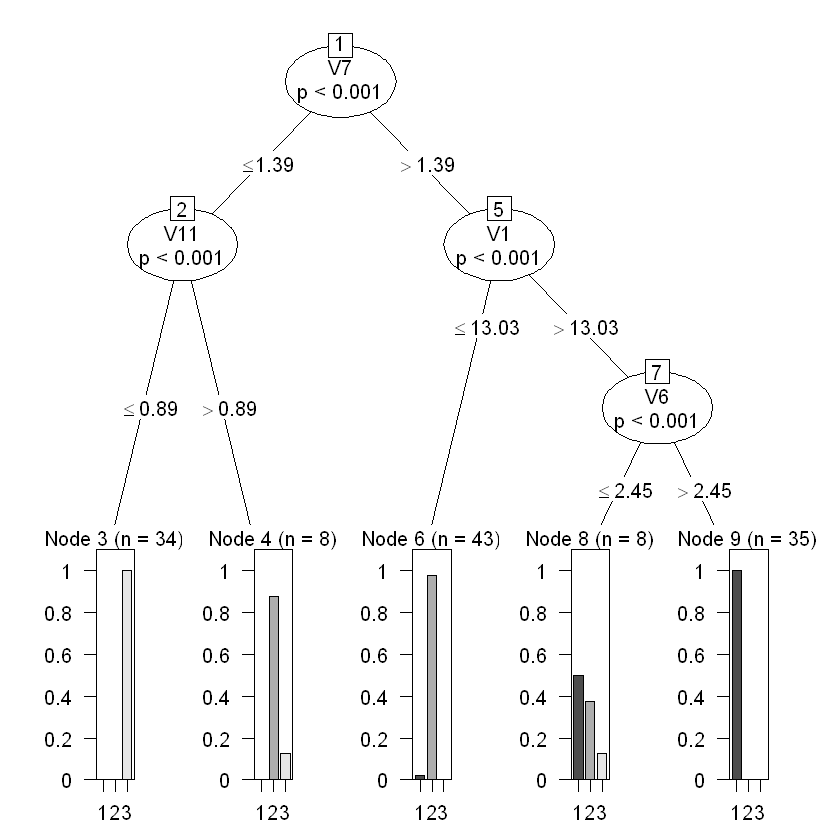

In [18]:
plot(wine_party)

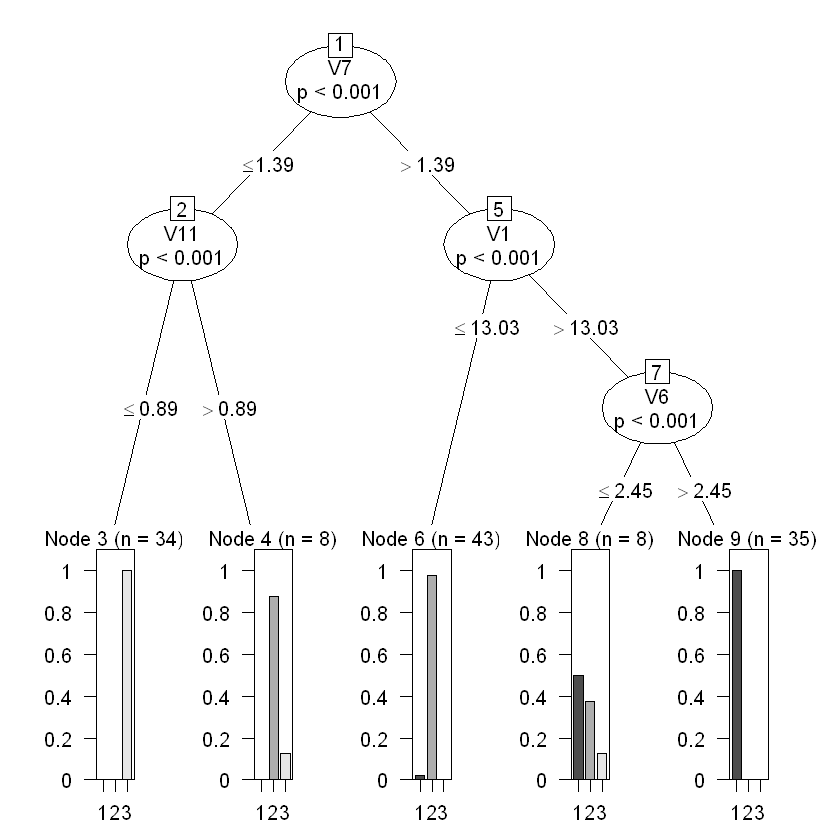

In [19]:
plot(wine_party, terminal_panel = node_barplot)

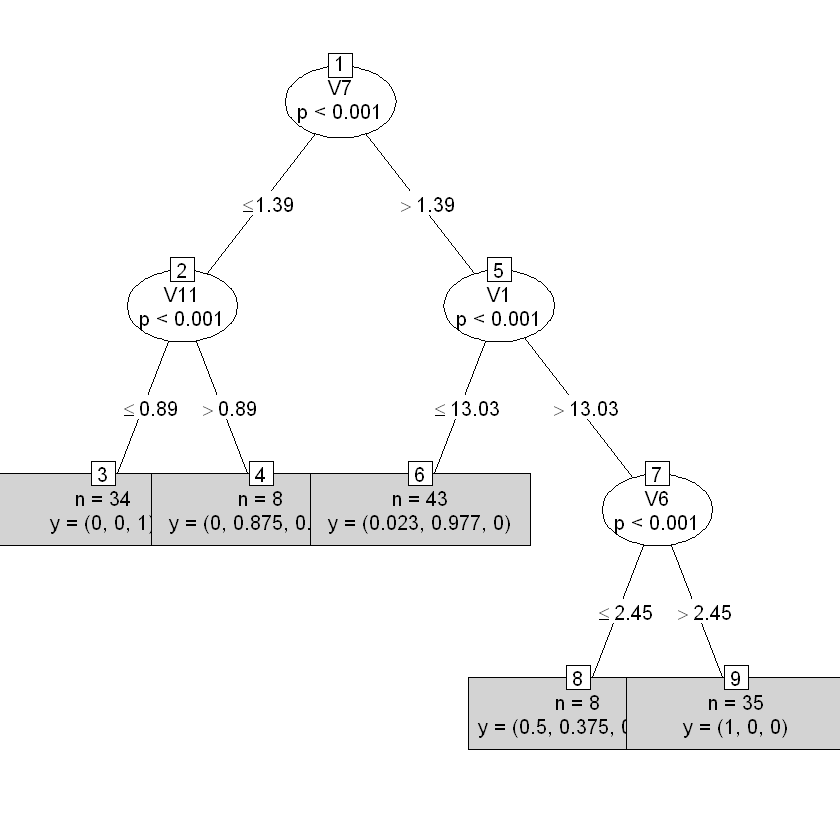

In [20]:
plot(mdl_party,type = "simple")

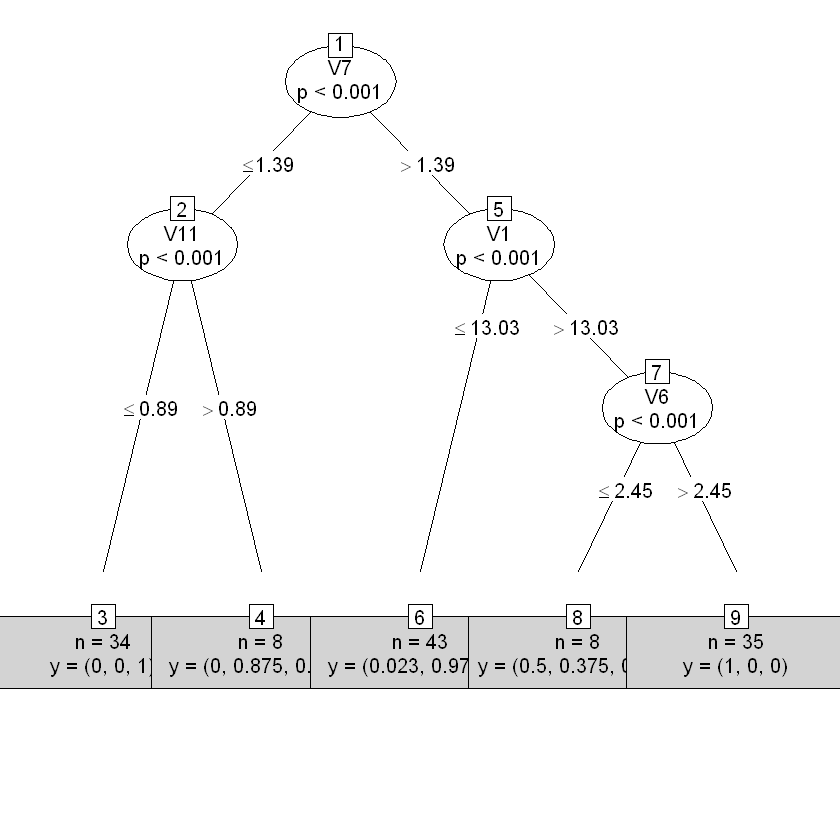

In [22]:
plot(mdl_party,terminal_panel = node_terminal)

* ### Performance Check (Train Set)

In [23]:
res_tr <- table(predict(wine_party), tr_wine$class)

In [24]:
res_tr / sum(res_tr)

   
            1         2         3
  1 0.3046875 0.0234375 0.0078125
  2 0.0078125 0.3828125 0.0078125
  3 0.0000000 0.0000000 0.2656250

* Accuracy

In [26]:
sum(diag(res_tr))/sum(res_tr)

[1] 0.953125

* Precision

In [27]:
res_tr[1,1]/sum(res_tr[1,])
res_tr[2,2]/sum(res_tr[2,])
res_tr[3,3]/sum(res_tr[3,])

[1] 0.9069767

[1] 0.9607843

[1] 1

* Detect Rate(Sensitivity)

In [28]:
res_tr[1,1]/sum(res_tr[,1])
res_tr[2,2]/sum(res_tr[,2])
res_tr[3,3]/sum(res_tr[,3])

[1] 0.975

[1] 0.9423077

[1] 0.9444444

* ### Performance (Validation Set)

In [29]:
res_val<-table(predict(wine_party,newdata=val_wine),val_wine$class)
res_val/sum(res_val)

   
       1    2    3
  1 0.36 0.06 0.00
  2 0.02 0.30 0.02
  3 0.00 0.02 0.22

* Accuracy

In [30]:
sum(diag(res_val))/sum(res_val)

[1] 0.88

* Precision

In [31]:
res_val[1,1]/sum(res_val[1,])
res_val[2,2]/sum(res_val[2,])
res_val[3,3]/sum(res_val[3,])

[1] 0.8571429

[1] 0.8823529

[1] 0.9166667

* Detect Rate

In [32]:
res_val[1,1]/sum(res_val[,1])
res_val[2,2]/sum(res_val[,2])
res_val[3,3]/sum(res_val[,3])

[1] 0.9473684

[1] 0.7894737

[1] 0.9166667